<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT
## Title :  P09 Sample Data Analysis and Exploration

#### Name: Phua Yan Han

#### IC Number: 050824070059

#### Date : 28/6/23

#### Introduction : Learning how to plot graph using data frame



#### Conclusion : learned how to filter data frame to plot graph






# Module P9 - Sample Data Analysis and Exploration

In this module, you will try your hand at performing some data analysis on some data. Before that, you should also try to prepare the data as well as you can by doing some data cleaning and preparation. And finally, your analysis can be better captured in the form of some data visualizations.

First, let's import all the necessary packages.

In [71]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

The data that we are going to use contains some sample sales data, and it is taken from [Kaggle](https://www.kaggle.com/kyanyoga/sample-sales-data). It's not a very big dataset, having only ~2,800 rows of data.

In [4]:
df = pd.read_csv("../Data files/sales_data_sample.csv", encoding='windows-1252')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Here are some questions that you would be interested to uncover when you perform an exploratory data analysis (or 'EDA' in short) on some sample data. 

1. Identify **where** customers are coming from.

2. Find out their **yearly retail performance** (in terms of total revenue).

3. What **product categories** are the most and least popular?

4. Who are their **most valuable customers** (basically we define this as those who purchased the most from them) ?

Feel free to refine these questions in more detailed (if you wish), or define other interesting questions that you want to find out from this data.

There are some interesting "catches" to consider as well. For example, the 'Status' for most entries are mostly "Shipped", but there are other statuses, i.e. "In Process", "Disputed", "Cancelled", etc. It is up to you to define which of these entries (based on their statuses) that should be considered in your analysis and which should be left out.


*Note: You can do your prototyping here (and transfer relevant lines of code to your source file later), or directly work on the source file using Spyder.*

In [38]:
# not unique where are customer coming from
nonUnique=df['COUNTRY'].value_counts()
print(nonUnique)

# unique where are custoner coming from
uniques=df.groupby(["CONTACTFIRSTNAME","CONTACTLASTNAME"])['COUNTRY'].unique().value_counts()
uniques.index = uniques.index.map(lambda x: ', '.join(map(str, x)))
print(uniques)

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64
USA            35
France         12
Australia       5
Spain           5
UK              5
Canada          3
Italy           3
Germany         3
Norway          3
Finland         3
Belgium         2
Sweden          2
Japan           2
Singapore       2
Austria         2
Denmark         2
Philippines     1
Ireland         1
Switzerland     1
Name: COUNTRY, dtype: int64


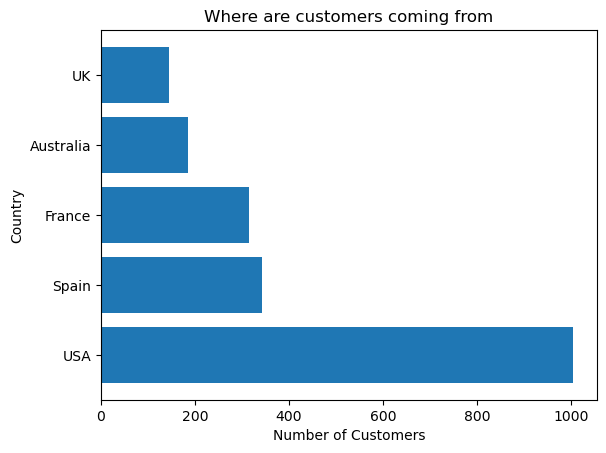

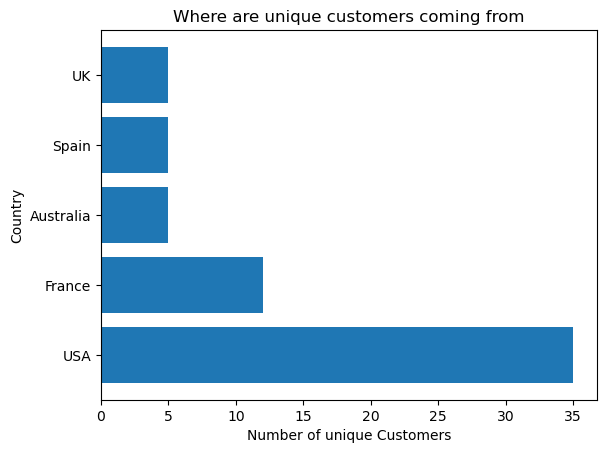

In [42]:
# plot non unique graph
plt.barh(nonUnique.head().index, nonUnique.head().values)
plt.ylabel("Country")
 
plt.xlabel("Number of Customers")
plt.title("Where are customers coming from")
plt.show()

# plot unique graph
plt.barh(uniques.head().index, uniques.head().values)
plt.ylabel("Country")
 
plt.xlabel("Number of unique Customers")
plt.title("Where are unique customers coming from")
plt.show()

In [99]:
# yearly retail performance sums
sumWithYear=df.groupby(["MONTH_ID","YEAR_ID"])['SALES'].sum()
sumsWithYear=df.groupby(["YEAR_ID","MONTH_ID"])['SALES'].sum()
print(sumsWithYear)
sumsWithoutYear=df.groupby(["YEAR_ID"])['SALES'].sum()
print(sumsWithoutYear)

YEAR_ID  MONTH_ID
2003     1            129753.60
         2            140836.19
         3            174504.90
         4            201609.55
         5            192673.11
         6            168082.56
         7            187731.88
         8            197809.30
         9            263973.36
         10           568290.97
         11          1029837.66
         12           261876.46
2004     1            316577.42
         2            311419.53
         3            205733.73
         4            206148.12
         5            273438.39
         6            286674.22
         7            327144.09
         8            461501.27
         9            320750.91
         10           552924.25
         11          1089048.01
         12           372802.66
2005     1            339543.42
         2            358186.18
         3            374262.76
         4            261633.29
         5            457861.06
Name: SALES, dtype: float64
YEAR_ID
2003    3516979.54

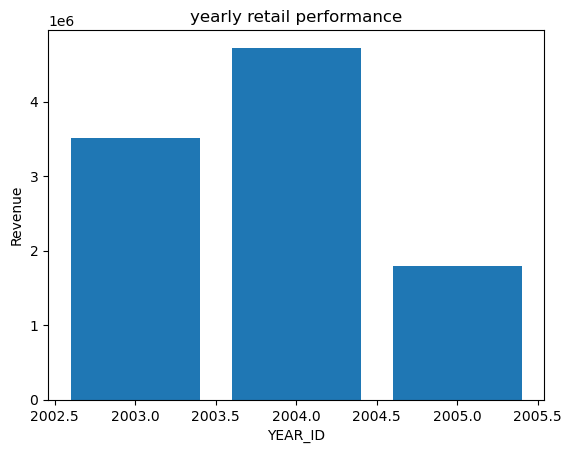

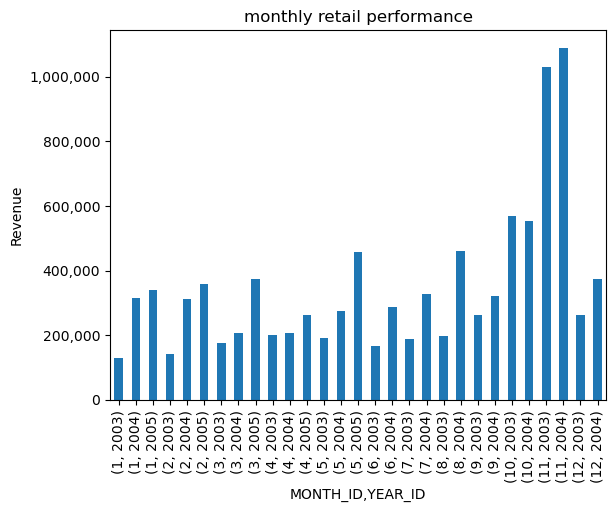

In [97]:
# yearly retail performance sum graph
plt.bar(sumsWithoutYear.index, sumsWithoutYear.values)
plt.ylabel("Revenue")
 
plt.xlabel("YEAR_ID")
plt.title("yearly retail performance")
plt.show()

# monthly retail performance
fig, ax = plt.subplots()

sumWithYear.plot(kind='bar', ax=ax)

ax.set_ylabel("Revenue")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title("monthly retail performance")
plt.show()

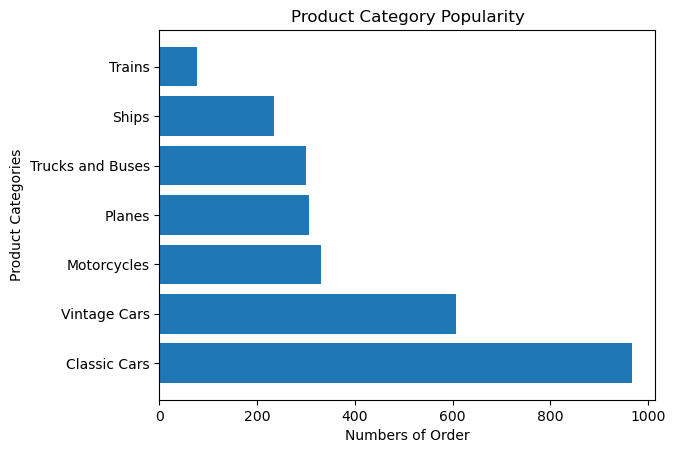

In [79]:
productPopularity = df['PRODUCTLINE'].value_counts()

plt.barh(productPopularity.index, productPopularity.values)
plt.ylabel("Product Categories")
 
plt.xlabel("Numbers of Order")
plt.title("Product Category Popularity")
plt.show()

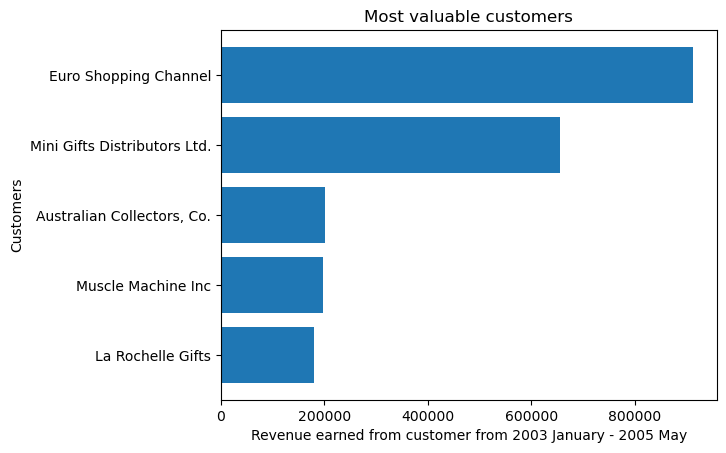

In [95]:
MVC = df.groupby(["CUSTOMERNAME"])['SALES'].sum().sort_values(ascending=False)

plt.barh(MVC.head().loc[::-1].index, MVC.head().loc[::-1].values)
plt.ylabel("Customers")
 
plt.xlabel("Revenue earned from customer from 2003 January - 2005 May")
plt.title("Most valuable customers")
plt.show()